# Model #4 for image prediction

In [2]:
import numpy as np
import pandas as pd
# from skimage import imread
from matplotlib.image import imread
import plotly.express as px
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models,callbacks,metrics,backend
from tensorflow.keras.optimizers import RMSprop
import sys
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# sys.path.append(os.path.abspath(r'C:\Users\raulg\Documents\THEBRIDGE_DS\0.-Repo_Git\ml_alzheimer_class\src'))
sys.path.append(os.path.relpath('../src'))
import utils as ut
import evaluation as ev
import math


This model looks for pure accuracy optimization. Three ways for this:
- 4a adds a new layer for the CNN model.
- 4b uses a different optimizer.
- 4c takes a resized data of 64x64 (instead of 32x32)

## Data loading and mix

In [74]:
x1_train,x1_test,x1_val,y1_train,y1_test,y1_val = ut.img_images_load(val_set = True)


x1_train shape (34326, 32, 32, 1)
x1_test shape (6058, 32, 32, 1)
y1_train shape (34326,)
y1_test shape (6058,)
y1_train distribution: 
 [[    0 10880]
 [    1  9520]
 [    2  8377]
 [    3  5549]]
y1_test distribution: 
 [[   0 1920]
 [   1 1680]
 [   2 1479]
 [   3  979]]
x1_val shape (6866, 32, 32, 1)
y1_val shape (6866,)
y1_val distribution: 
 [[   0 2176]
 [   1 1904]
 [   2 1676]
 [   3 1110]]


## Model 4a

In [4]:
model4a = models.Sequential()
model4a.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model4a.add(layers.MaxPooling2D((2, 2)))
model4a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4a.add(layers.MaxPooling2D((2, 2)))
model4a.add(layers.Conv2D(32, (3, 3), activation='relu'))
model4a.add(layers.MaxPooling2D((2, 2)))
model4a.add(layers.Flatten())

# Capa densa con Dropout
model4a.add(layers.Dense(32, activation='relu'))
model4a.add(layers.Dropout(0.5))  # Dropout para reducir overfitting

model4a.add(layers.Dense(4, activation='softmax'))

# Compilar el modelo
model4a.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy
              metrics=['accuracy'])

model4a.fit(x1_train,y1_train,batch_size=128,epochs=70,validation_data=(x1_val,y1_val), callbacks=callbacks.EarlyStopping(patience=5)
          )

Epoch 1/70


c:\Users\raulg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.3364 - loss: 1.3286 - val_accuracy: 0.5386 - val_loss: 1.0659
Epoch 2/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5206 - loss: 1.0245 - val_accuracy: 0.6175 - val_loss: 0.8284
Epoch 3/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5847 - loss: 0.8809 - val_accuracy: 0.6484 - val_loss: 0.7468
Epoch 4/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6167 - loss: 0.8015 - val_accuracy: 0.6689 - val_loss: 0.7166
Epoch 5/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6497 - loss: 0.7385 - val_accuracy: 0.6858 - val_loss: 0.6849
Epoch 6/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6774 - loss: 0.6971 - val_accuracy: 0.7192 - val_loss: 0.6127
Epoch 7/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7003 - loss: 0.6399 - val_accuracy: 0.7310 - val_loss: 0.5867
Epoch 8/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7186 - loss: 0.6071 - val_accuracy: 0.726

In [6]:
model4a.evaluate(x1_test, y1_test)

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8424 - loss: 0.4205


[0.4229222536087036, 0.8445031642913818]

In [8]:
recall_score(y1_test, model4a.predict(x1_test).argmax(axis=1),average='weighted')

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


np.float64(0.84450313634863)

In [14]:
confusion_matrix(y1_test, model4a.predict(x1_test).argmax(axis=1),normalize='pred') #,normalize='pred'

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.83183633, 0.12248521, 0.02926116, 0.00601805],
       [0.13872255, 0.75621302, 0.08339429, 0.01003009],
       [0.02944112, 0.11360947, 0.88441843, 0.01905717],
       [0.        , 0.00769231, 0.00292612, 0.96489468]])

## Model 4b

In [15]:
model4b = models.Sequential()
model4b.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model4b.add(layers.MaxPooling2D((2, 2)))
model4b.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4b.add(layers.MaxPooling2D((2, 2)))
model4b.add(layers.Conv2D(32, (3, 3), activation='relu'))
model4b.add(layers.MaxPooling2D((2, 2)))
model4b.add(layers.Flatten())

# Capa densa con Dropout
model4b.add(layers.Dense(32, activation='relu'))
model4b.add(layers.Dropout(0.5))  # Dropout para reducir overfitting

model4b.add(layers.Dense(4, activation='softmax'))

# Compilar el modelo
model4b.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy
              metrics=['accuracy'])

model4b.fit(x1_train,y1_train,batch_size=128,epochs=70,validation_data=(x1_val,y1_val), callbacks=callbacks.EarlyStopping(patience=5)
          )

c:\Users\raulg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.3555 - loss: 1.3118 - val_accuracy: 0.5334 - val_loss: 1.0328
Epoch 2/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.5192 - loss: 1.0215 - val_accuracy: 0.6148 - val_loss: 0.8327
Epoch 3/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5886 - loss: 0.8726 - val_accuracy: 0.6306 - val_loss: 0.7515
Epoch 4/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6308 - loss: 0.7804 - val_accuracy: 0.6904 - val_loss: 0.6913
Epoch 5/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6712 - loss: 0.7099 - val_accuracy: 0.6882 - val_loss: 0.6615
Epoch 6/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7062 - loss: 0.6517 - val_accuracy: 0.6564 - val_loss: 0.6855
Epoch 7/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7310 - loss: 0.6010 - val_accuracy: 0.7693 - val_loss: 0.5385
Epoch 8/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7589 - loss: 0.5439 - val_accu

In [16]:
model4b.evaluate(x1_test, y1_test)

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8776 - loss: 0.4065


[0.41098645329475403, 0.8763618469238281]

In [17]:
recall_score(y1_test, model4b.predict(x1_test).argmax(axis=1),average='weighted')

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


np.float64(0.8763618355893034)

In [18]:
confusion_matrix(y1_test, model4b.predict(x1_test).argmax(axis=1),normalize='pred') #,normalize='pred'

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.8940926 , 0.10171496, 0.04379085, 0.00104384],
       [0.08408728, 0.81431106, 0.08954248, 0.00835073],
       [0.02075572, 0.07510349, 0.85490196, 0.00521921],
       [0.0010644 , 0.00887049, 0.01176471, 0.98538622]])

 ## Model 4c

### Resizing to 64x64

In [2]:
ROOT_PATH = os.getcwd()
TRAIN_PATH = "../data/images/train/"
TEST_PATH = "../data/images/val/"
### Training dataframe
main_dir = TRAIN_PATH
folders = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
img_dict = {'image':[],'label':[]}

for folder in folders:
    folder_path = os.path.join(main_dir,folder)
    files_folder = os.listdir(folder_path)
    for file in files_folder:
        file_name = os.path.basename(file)
        img_dict['image'].append(file_name)
        img_dict['label'].append(folder)

df_train = pd.DataFrame(img_dict)
df_train.head()

,image,label
0,00046ff7-0fae-4796-9a2b-2df47095bfe6.jpg,MildDemented
1,000cdcc4-3e54-4034-a538-203c8047b564.jpg,MildDemented
2,0013ad52-8398-4892-9fde-060eb1ae956d.jpg,MildDemented
3,0015bdfc-2059-4195-8eff-9c5cf2e2c025.jpg,MildDemented
4,001f15e8-6ad4-4e7a-bc36-b62b984dad69.jpg,MildDemented


In [3]:
x1 = []
y1 = []

for i,row in df_train.iterrows():
    count = 1
    print(f'Opening image #{count} ,{row['label']}')
    image_path = os.path.join(TRAIN_PATH, row['label'],row['image'])
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        continue

    image = cv2.resize(image, (64, 64)) ### 64x64 pixels
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) ### Conversion to gray scale
    x1.append(image)
    y1.append(row['label'])
    count +=1

### Lists
x1 = np.array(x1)
y1 = np.array(y1)

Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening 

(33984, 64, 64)
(33984,)


In [115]:
pickle.dump(x1,open('../data/images/processed_train/x1_64.pkl','wb'))
pickle.dump(y1,open('../data/images/processed_train/y1_64.pkl','wb'))

NameError: name 'x1' is not defined

In [60]:
### Val dataframe
main_dir = TEST_PATH
folders = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
img_dict = {'image':[],'label':[]}

for folder in folders:
    folder_path = os.path.join(main_dir,folder)
    files_folder = os.listdir(folder_path)
    for file in files_folder:
        file_name = os.path.basename(file)
        img_dict['image'].append(file_name)
        img_dict['label'].append(folder)

df_test = pd.DataFrame(img_dict)
df_test.head()

,image,label
0,26 (19).jpg,MildDemented
1,26 (20).jpg,MildDemented
2,26 (21).jpg,MildDemented
3,26 (22).jpg,MildDemented
4,26 (23).jpg,MildDemented


In [5]:
x2 = []
y2 = []

for i,row in df_test.iterrows():
    count = 1
    print(f'Opening image #{count} ,{row['label']}')
    image_path = os.path.join(TEST_PATH, row['label'],row['image'])
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        continue

    image = cv2.resize(image, (64, 64)) ### 64x64 pixels
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) ### Conversion to gray scale
    x2.append(image)
    y2.append(row['label'])
    count +=1

### Lists
x2 = np.array(x2)
y2 = np.array(y2)

Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening image #1 ,MildDemented
Opening 

In [3]:
pickle.dump(x2,open('../data/images/processed_val/x2_64.pkl','wb'))
pickle.dump(y2,open('../data/images/processed_val/y2_64.pkl','wb'))

NameError: name 'x2' is not defined

Data conversion with img_images_load

In [2]:
x1_train,x1_test,x1_val,y1_train,y1_test,y1_val,scal = ut.img_images_load('../data/images/processed_train/x1_64.pkl','../data/images/processed_train/y1_64.pkl',
                                                                     '../data/images/processed_val/x2_64.pkl','../data/images/processed_val/y2_64.pkl',
                                                                     val_set = True,reshuffle=True,img_size=64)
# x1_train,x1_test,x1_val,y1_train,y1_test,y1_val = ut.img_images_load(val_set = True,reshuffle=False)

x1_train shape (34326, 64, 64, 1)
x1_test shape (6058, 64, 64, 1)
y1_train shape (34326,)
y1_test shape (6058,)
y1_train distribution: 
 [[    0 10880]
 [    1  9520]
 [    2  8377]
 [    3  5549]]
y1_test distribution: 
 [[   0 1920]
 [   1 1680]
 [   2 1479]
 [   3  979]]
x1_val shape (6866, 64, 64, 1)
y1_val shape (6866,)
y1_val distribution: 
 [[   0 2176]
 [   1 1904]
 [   2 1676]
 [   3 1110]]


In [8]:
unique_val, counts_val = np.unique(y1_val, return_counts=True)
y_dist = pd.DataFrame(np.asarray(counts_val))
y_dist

,0
0,2176
1,1904
2,1676
3,1110


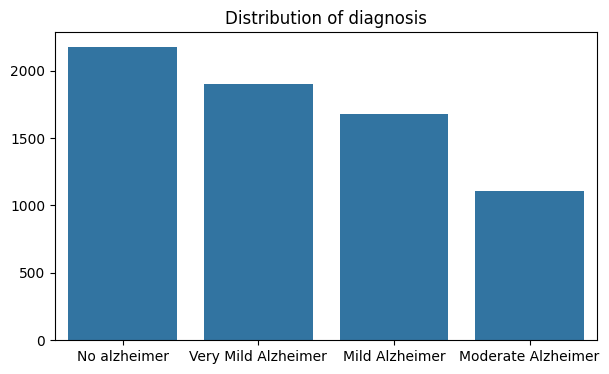

In [13]:
plt.figure(figsize=[7,4])
sns.barplot(y=counts_val,x=["No alzheimer",'Very Mild Alzheimer',
                                       'Mild Alzheimer','Moderate Alzheimer'])

plt.title('Distribution of diagnosis');

### Modelling

In [ ]:
### COMP TIME: 14 minutes
model4c = models.Sequential()
model4c.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model4c.add(layers.MaxPooling2D((2, 2)))
model4c.add(layers.Conv2D(256, (3, 3), activation='relu'))
model4c.add(layers.MaxPooling2D((2, 2)))
model4c.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4c.add(layers.MaxPooling2D((2, 2)))
model4c.add(layers.Flatten())

# Capa densa con Dropout
model4c.add(layers.Dense(64, activation='relu'))
model4c.add(layers.Dropout(0.5))  # Dropout so overfitting is reduced

model4c.add(layers.Dense(4, activation='softmax'))

# Compilar el modelo
model4c.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy
              metrics=['accuracy'])

model4c.fit(x1_train,y1_train,batch_size=128,epochs=70,validation_data=(x1_val,y1_val), callbacks=callbacks.EarlyStopping(patience=5)
          )

c:\Users\raulg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 90s 411ms/step - accuracy: 0.3469 - loss: 1.3973 - val_accuracy: 0.5766 - val_loss: 1.0557
Epoch 2/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 93s 431ms/step - accuracy: 0.5352 - loss: 0.9864 - val_accuracy: 0.6413 - val_loss: 0.8812
Epoch 3/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 88s 410ms/step - accuracy: 0.5942 - loss: 0.8386 - val_accuracy: 0.7107 - val_loss: 0.7713
Epoch 4/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 89s 414ms/step - accuracy: 0.6415 - loss: 0.7417 - val_accuracy: 0.7520 - val_loss: 0.6807
Epoch 5/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 88s 411ms/step - accuracy: 0.6655 - loss: 0.6832 - val_accuracy: 0.7719 - val_loss: 0.5989
Epoch 6/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 86s 402ms/step - accuracy: 0.7107 - loss: 0.6175 - val_accuracy: 0.7920 - val_loss: 0.5744
Epoch 7/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 87s 407ms/step - accuracy: 0.7387 - loss: 0.5685 - val_accuracy: 0.7788 - val_loss: 0.5397
Epoch 8/70
215/215 ━━━━━━━━━━━━━━━━━━━━ 86s 401ms/step - accuracy: 0.7580 - loss: 0

In [ ]:
model4c.save("../models/image/model_4.keras")

In [ ]:
# model5 = models.load_model("../models/image/model_5.keras")
x1_train,x1_test,x1_val,y1_train,y1_test,y1_val,scal = ut.img_images_load('../data/images/processed_train/x1_64.pkl','../data/images/processed_train/y1_64.pkl',
                                                                     '../data/images/processed_val/x2_64.pkl','../data/images/processed_val/y2_64.pkl',
                                                                     val_set = True,reshuffle=True,img_size=64)


x1_train shape (34326, 64, 64, 1)
x1_test shape (6058, 64, 64, 1)
y1_train shape (34326,)
y1_test shape (6058,)
y1_train distribution: 
 [[    0 10880]
 [    1  9520]
 [    2  8377]
 [    3  5549]]
y1_test distribution: 
 [[   0 1920]
 [   1 1680]
 [   2 1479]
 [   3  979]]
x1_val shape (6866, 64, 64, 1)
y1_val shape (6866,)
y1_val distribution: 
 [[   0 2176]
 [   1 1904]
 [   2 1676]
 [   3 1110]]
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step


190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


In [5]:
model4c.evaluate(x1_test, y1_test)

190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8684 - loss: 0.3818


[0.38362962007522583, 0.8667877316474915]

In [9]:
recall_score(y1_test, y1_pred,average='weighted')

np.float64(0.8667877187190491)

In [ ]:
confusion_matrix(y1_test, model4c.predict(x1_test).argmax(axis=1)) #,normalize='pred'

array([[0.96943522, 0.16053333, 0.09375   , 0.00101833],
       [0.02724252, 0.77973333, 0.10082547, 0.00610998],
       [0.00332226, 0.05813333, 0.80188679, 0.00509165],
       [0.        , 0.0016    , 0.00353774, 0.98778004]])

In [13]:
x1_test.shape

(6058, 64, 64, 1)

### Testing for Streamlit

In [17]:
test_pred = model4c.predict(x1_test)
test_pred[1]

190/190 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step


array([1.4940484e-12, 7.0023256e-05, 4.6862752e-08, 9.9993002e-01],
      dtype=float32)

In [18]:
test_pred[1].round(3)

array([0., 0., 0., 1.], dtype=float32)

In [35]:
test_pred_show = test_pred[1].round(3)
mapping = {
        'Non Demented': 0,
        'Very Mild Demented': 1,
        'Mild Demented': 2,
        'Moderate Demented': 3
    }

In [40]:
test_pred_show

array([0.   , 0.133, 0.068, 0.799], dtype=float32)

In [33]:
mapping.keys()

dict_keys(['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented'])

In [39]:
px.pie(values=test_pred_show,names=mapping.keys(), title='Probabilities of the prediction')

In [42]:
test = np.array([[0., 0., 0., 1.]])
test.shape

(1, 4)

### Checking val images

In [19]:
x4_test = pickle.load(open('../data/images/processed_val/x2.pkl','rb'))
y4_test = pickle.load(open('../data/images/processed_val/y2.pkl','rb'))
x4_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [87]:
x1_train.shape

(27460, 64, 64, 1)

In [88]:
x1_train,x1_test,y1_train,y1_test = ut.img_images_load('../data/images/processed_train/x1_64.pkl','../data/images/processed_train/y1_64.pkl',
                                                                     '../data/images/processed_val/x2_64.pkl','../data/images/processed_val/y2_64.pkl',
                                                                     val_set = False,reshuffle=False,img_size=64)

In [20]:
test_pred = model4c.predict(x1_test)

190/190 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step


In [22]:
df_test_results = pd.DataFrame(test_pred.round(3))
# df_test_results = pd.concat([df_test_results],axis=1)
df_test_results

,0,1,2,3
0,0.000,1.000,0.000,0.0
1,0.000,0.000,0.000,1.0
2,0.000,1.000,0.000,0.0
3,0.917,0.083,0.000,0.0
4,0.000,0.014,0.986,0.0
...,...,...,...,...
6053,0.000,0.835,0.164,0.0
6054,0.000,0.000,1.000,0.0
6055,0.000,0.000,0.000,1.0
6056,1.000,0.000,0.000,0.0


In [ ]:
df_test_fil = df_test_results[(df_test_results[1]<1)&(df_test_results[1]>0)&(df_test_results['label']=='VeryMildDemented')] #

KeyError: 'label'

In [24]:
df_test_fil[1].mean()

np.float32(0.42243242)

In [91]:
test_pred = model4c.predict(x1_test)


200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step


In [4]:
ev.img_eval()

x1_train shape (34326, 64, 64, 1)
x1_test shape (6058, 64, 64, 1)
y1_train shape (34326,)
y1_test shape (6058,)
y1_train distribution: 
 [[    0 10880]
 [    1  9520]
 [    2  8377]
 [    3  5549]]
y1_test distribution: 
 [[   0 1920]
 [   1 1680]
 [   2 1479]
 [   3  979]]
x1_val shape (6866, 64, 64, 1)
y1_val shape (6866,)
y1_val distribution: 
 [[   0 2176]
 [   1 1904]
 [   2 1676]
 [   3 1110]]
190/190 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step
Accuracy 0.9385935952459558
Recall 0.9385935952459558
[[1803   95   21    1]
 [  78 1537   58    7]
 [  35   71 1368    5]
 [   0    1    0  978]]
